__Q4__

a)

First of all, we can assume that groups A, B, and C are independent from each other; since the subcontractors select the batches randomly. 

Since the sample size is small, the data must look highly non-normal for us to be able to reject the normality assumption. Still, let us perform the Shapiro–Wilk normality test and look at the rank plot. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
A = np.array([28, 37, 34, 29, 31, 33])
B = np.array([22, 27, 29, 20, 18, 30])
C = np.array([33, 29, 39, 33, 37, 38])

shapiro_A = stats.shapiro(A)
shapiro_B = stats.shapiro(B)
shapiro_C = stats.shapiro(C)

print("A:", shapiro_A.pvalue)
print("B:", shapiro_B.pvalue)
print("C:", shapiro_C.pvalue)

A: 0.8863675638867912
B: 0.44061922125445796
C: 0.5062106928056676


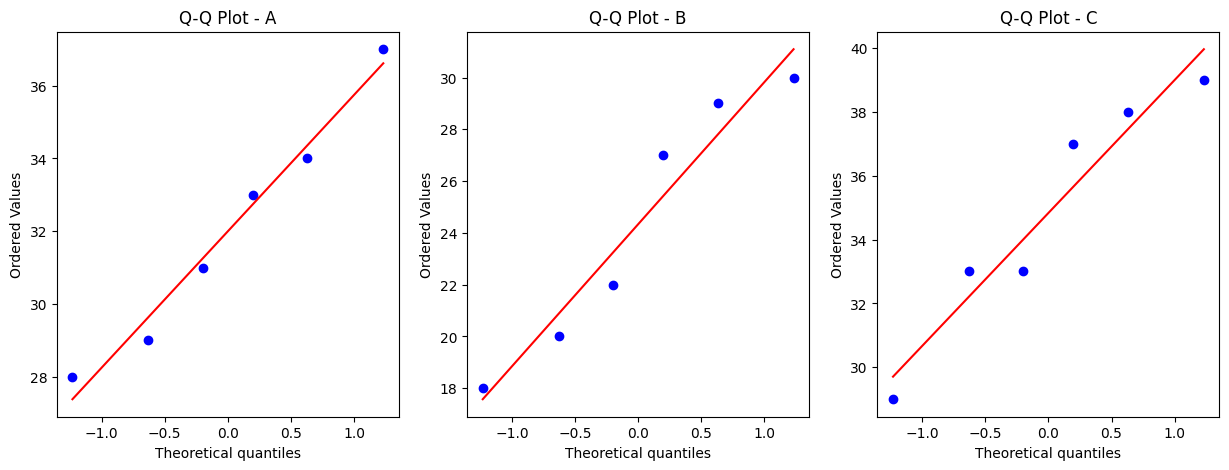

In [13]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))

stats.probplot(A, plot=axs[0])
axs[0].set_title('Q-Q Plot - A')

stats.probplot(B, plot=axs[1])
axs[1].set_title('Q-Q Plot - B')

stats.probplot(C, plot=axs[2])
axs[2].set_title('Q-Q Plot - C')

plt.show()

Looking at this data, we fail to reject the normality assumption. 

To test for the equal variances assumption, we can use the Bartlett's test. Once again, the power of the test is going to suffer from the small sample size; so let us also check out if the largest group variance is within 4 times of the smallest group variance, which is the rule of thumb. 

In [15]:
stat, p_value = stats.bartlett(A, B, C)

print(stat, p_value)

var_A = np.var(A, ddof=1)  
var_B = np.var(B, ddof=1)
var_C = np.var(C, ddof=1)

max_var = max(var_A, var_B, var_C)
min_var = min(var_A, var_B, var_C)

if max_var <= 4 * min_var:
    print("within 4 times")

0.7972876015327337 0.6712297502990411
within 4 times


Looking at the p-value, we also fail to reject the equal variances assumption. Now let us perform the ANOVA.

In [16]:
F_stat,p_value_ = stats.f_oneway(A,B,C)
print(F_stat, p_value_)

10.449180327868845 0.001437556159283074


With the p-value above, we can reject the null hypothesis that the means are equal at the significance level of 5%.

b)

For this question, we will perform pairwise t-tests and apply the Bonferroni's correction to the significance level. 

In [17]:
t_stat_AB, p_value_AB = stats.ttest_ind(A, B)
t_stat_AC, p_value_AC = stats.ttest_ind(A, C)
t_stat_BC, p_value_BC = stats.ttest_ind(B, C)

alpha = 0.05
alpha_bonferroni = alpha / 3  # since there are 3 groups
print(alpha_bonferroni)

print("Pairwise t-test results:")
print(p_value_AB, p_value_AC, p_value_BC)

0.016666666666666666
Pairwise t-test results:
0.010904089018509497 0.20149485926614868 0.0021952955658764493


We reject the hypothesis that means of A-B and B-C are equal, whereas we fail to reject that means of A-C are equal. 